<a href="https://colab.research.google.com/github/kaybrian/Tensorflow_self_study/blob/main/Keras_Classfication_modal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [32]:
df = pd.read_csv('/content/cancer_classification.csv')

In [33]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [35]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<Axes: xlabel='benign_0__mal_1', ylabel='count'>

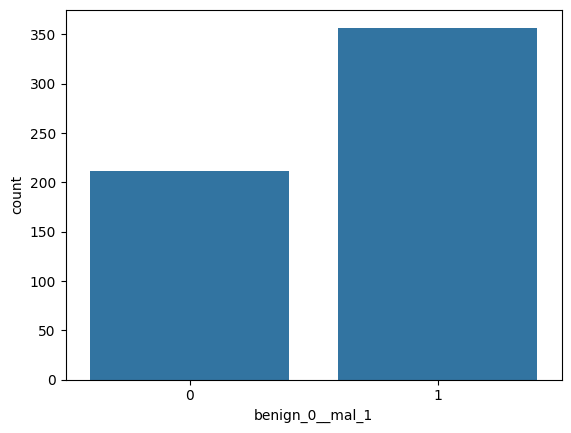

In [36]:
sns.countplot(x='benign_0__mal_1', data=df)

In [37]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


<Axes: >

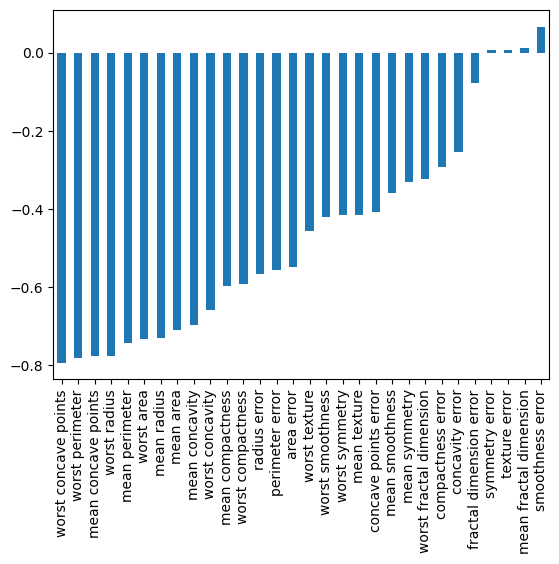

In [38]:
df.corr()['benign_0__mal_1'].sort_values()[:-1].plot(kind='bar')

<Axes: >

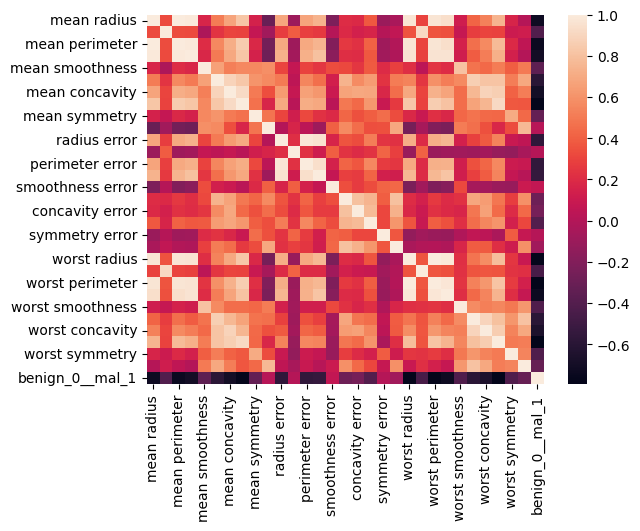

In [39]:
sns.heatmap(data=df.corr())

In [41]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [42]:
from sklearn.model_selection import train_test_split



In [82]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [83]:
from sklearn.preprocessing import MinMaxScaler

In [84]:
scaler = MinMaxScaler()

In [85]:
X_train = scaler.fit_transform(X_train)

In [86]:
X_test = scaler.fit_transform(X_test)

In [87]:
from tensorflow.keras.models import Sequential

In [88]:
from tensorflow.keras.layers import Dense, Dropout

In [89]:
y_train.shape

(426,)

In [90]:
X_train.shape


(426, 30)

An example of Overfitting the model when running many epochs



In [91]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

# binary classification
model.add(Dense(1, activation='sigmoid'))

model.compile(loss="binary_crossentropy", optimizer='adam')

In [93]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

Epoch 1/600
14/14 [==============================] - 0s 20ms/step - loss: 0.6461 - val_loss: 0.6115
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6128 - val_loss: 0.5737
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5756 - val_loss: 0.5288
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5307 - val_loss: 0.4798
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4834 - val_loss: 0.4330
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4397 - val_loss: 0.3884
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4001 - val_loss: 0.3494
Epoch 8/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3592 - val_loss: 0.3136
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3267 - val_loss: 0.2863
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.2983 - val_loss: 0.2644
Epoch 11

In [94]:
losses = pd.DataFrame(model.history.history)

<Axes: >

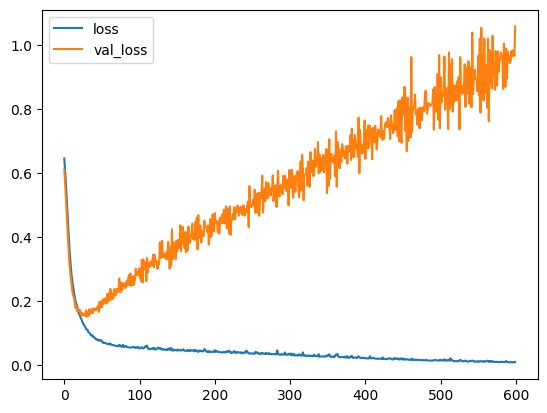

In [95]:
losses.plot()


Going to Redo the model but this time round we need to use the call back in keras to stop the over fitting


In [96]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

# binary classification
model.add(Dense(1, activation='sigmoid'))

model.compile(loss="binary_crossentropy", optimizer='adam')

In [97]:
from tensorflow.keras.callbacks import EarlyStopping


In [98]:
early_stop = EarlyStopping(monitor='val_loss', mode="min", verbose=1, patience=25)

In [99]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 2s 26ms/step - loss: 0.6805 - val_loss: 0.6608
Epoch 2/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6450 - val_loss: 0.6227
Epoch 3/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6088 - val_loss: 0.5801
Epoch 4/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5655 - val_loss: 0.5314
Epoch 5/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5169 - val_loss: 0.4813
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4650 - val_loss: 0.4260
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4128 - val_loss: 0.3770
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3674 - val_loss: 0.3347
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3255 - val_loss: 0.2924
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.2894 - val_loss: 0.2716
Epoch 11

In [100]:
model_loss = pd.DataFrame(model.history.history)

<Axes: >

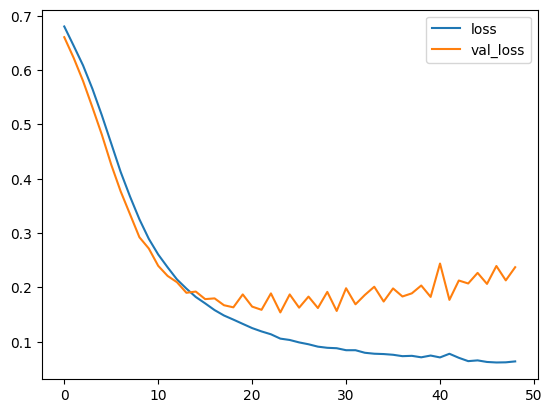

In [101]:
model_loss.plot()

Working with the dense layers and adding thr dropouts in the code


In [102]:
from tensorflow.keras.layers import Dropout

In [103]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))
# binary classification
model.add(Dense(1, activation='sigmoid'))

model.compile(loss="binary_crossentropy", optimizer='adam')

In [104]:
early_stop = EarlyStopping(monitor='val_loss', mode="min", verbose=1, patience=25)

In [105]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 2s 17ms/step - loss: 0.6722 - val_loss: 0.6443
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6581 - val_loss: 0.6164
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6230 - val_loss: 0.5899
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6104 - val_loss: 0.5720
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6026 - val_loss: 0.5531
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5714 - val_loss: 0.5276
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5509 - val_loss: 0.4894
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5309 - val_loss: 0.4550
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5349 - val_loss: 0.4281
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5196 - val_loss: 0.4084
Epoch 11

In [106]:
model_loss = pd.DataFrame(model.history.history)

<Axes: >

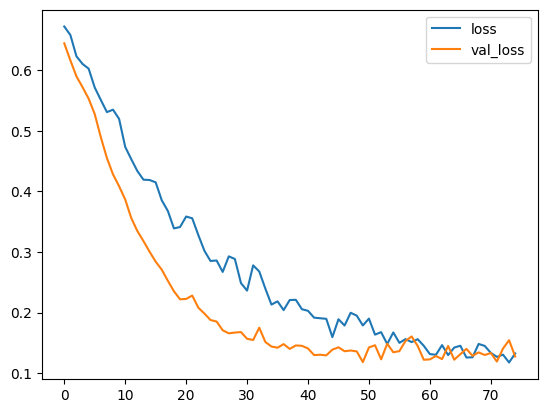

In [107]:
model_loss.plot()

In [114]:
predictions = np.argmax(model.predict(X_test),axis=1)



5/5 [==============================] - 0s 3ms/step


In [115]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [116]:
from sklearn.metrics import classification_report, confusion_matrix

In [117]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.38      1.00      0.56        55
           1       0.00      0.00      0.00        88

    accuracy                           0.38       143
   macro avg       0.19      0.50      0.28       143
weighted avg       0.15      0.38      0.21       143



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [119]:
print(confusion_matrix(y_test,predictions))

[[55  0]
 [88  0]]
